# Лабораторная работа №2

## Понижение размерности пространства признаков

**Цель:**

Ознакомиться с методами понижения размерности данных из библиотеки Scikit Learn

## Выполнение:

## Загрузка данных

1. Загрузить датасет по ссылке: https://www.kaggle.com/uciml/glass . Данные представлены в виде csv таблицы.

2. Создать Python скрипт. Загрузить датасет в датафрейм, и разделить данные на описательные признаки и признак отображающий класс.

**Примечание**

Задания с пометкой *(Для углубленного изучения)* - для сдачи работы не обязательны

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('glass.csv')

In [3]:
var_names = list(df.columns) #получение имен признаков
labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки

3. Провести нормировку данных к интервалу [0 : 1]

In [4]:
from sklearn import preprocessing

In [5]:
data = preprocessing.minmax_scale(data)

4. Построить диаграммы рассеяния для пар признаков. Самостоятельно определите соответствие цвета на диаграмме и класса в датасете

In [6]:
import matplotlib.pyplot as plt

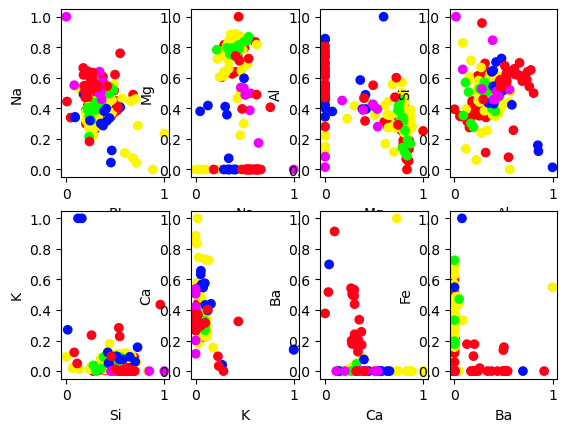

In [7]:
fig, axs = plt.subplots(2,4)
for i in range(data.shape[1]-1):
    axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],c=labels,cmap='hsv')
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i+1])

## Метод главных компонент

1. Используя метод главных компонент [(PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Проведите понижение размерности пространства до размерности 2

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

2. Выведите значение объясненной дисперсии в процентах и собственные числа соответствующие компонентам

In [10]:
pca.explained_variance_ratio_

array([0.45429569, 0.17990097])

In [11]:
pca.singular_values_

array([5.1049308 , 3.21245688])

3. Постройте диаграмму рассеяния после метода главных компонент

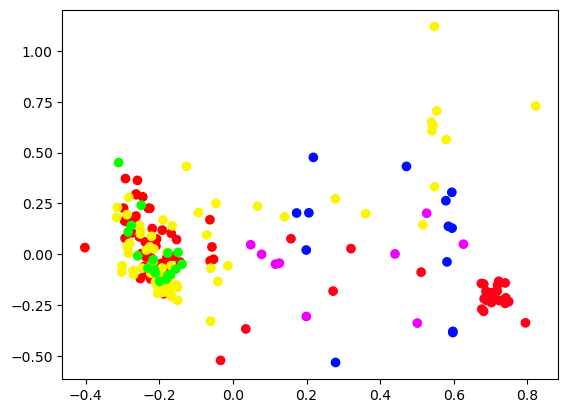

In [12]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')

4. Проанализируйте и обоснуйте полученные результаты

5. Изменяя количество компонент, определите количество при котором компоненты объясняют не менее 85% дисперсии данных

6. Используя метод **inverse_transform** восстановите данные, сравните с исходными

7. Исследуйте метод главных компонент при различных параметрах **svd_solver**

## Модификации метода главных компонент 

*(Для углубленного изучения)*

1. По аналогии с **PCA** исследуйте **[KernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA)** для различных параметров **kernel** и различных параметрах для ядра

2. Определите, при каких параметрах **KernelPCA** работает также как **PCA**

3. Аналогично исследуйте [SparcePCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html#sklearn.decomposition.SparsePCA)

4. Проанализируйте и обоснуйте полученные результаты

## Факторный анализ

1. Проведите понижении размерности используя факторный анализ [FactorAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html?highlight=factoranalysis#sklearn.decomposition.FactorAnalysis)

2. Сравните полученные результаты с PCA

3. Объясните в чем разница между методом главных компонент и факторным анализом